In [2]:
#Import 
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("final_cleaned.csv")

In [4]:
df.head()

,Unnamed: 0,RegDate,FirstParty,SecondParty,PropertyAddress,DeedType,PropertyType,Area(Sq.Meters)
0,0,01-01-2019,S C KHURANA,AJAY VISHAL,"House No. B-3/93,Safdarjung Enclave","LEASE,LEASE WITH SECURITY UPTO 5 YEARS",Residential,100.000000
1,1,02-01-2019,RAJESH KUMAR BHASIN,MIN HO KIM,"House No. A1/161 FF,Safdarjung Enclave","LEASE,LEASE WITH SECURITY UPTO 5 YEARS",Residential,190.449647
2,2,02-01-2019,SANDEEP ARVIND,RADHALAKSHMI R,"House No. A-1/257 F/F REAR PORTION,Safdarjung ...","LEASE,LEASE UPTO 5 YEARS",Residential,92.902267
3,3,03-01-2019,LIKHA SAAYA THRU ATT MANOJ KUMAR GULATI,KANUKPRIYA GULATI,"House No. FF PROP NO A-1/62,Safdarjung Enclave","SALE,SALE WITHIN MC AREA",Residential,370.401338
4,4,03-01-2019,VISHAL JAIRATH,ITHIKIA HEALTH SCIENCES LLP THRU CHAND RATAN D...,"House No. ENTIRE BASEMENT AND ENTIRE GF, Road ...","LEASE,LEASE WITH SECURITY UPTO 10 YEARS",Commercial,2000.000000


<H3> The RegDate Column needs to be converted into DateTime format for extaction months

In [6]:
df["RegDate"]=pd.to_datetime(df["RegDate"])

<h3> Extraction of months leads us to a visual of distribution of months 

Text(0.5, 0, 'MONTHS')

Text(0, 0.5, 'REGISTRATION COUNT')

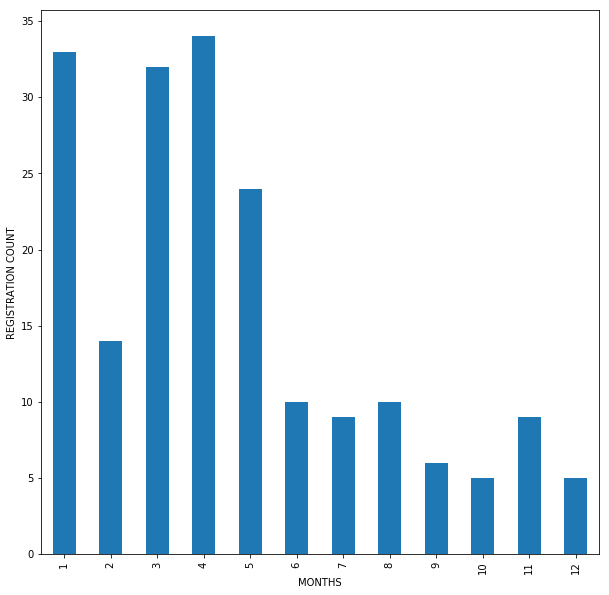

In [49]:
pd.DatetimeIndex(df['RegDate']).month.value_counts().sort_index().plot(kind="bar",figsize=(10,10))
plt.xlabel("MONTHS")
plt.ylabel("REGISTRATION COUNT")

<h3> Dealing with Months , replacing numbers with month names 

In [114]:
pd.DatetimeIndex(df['RegDate']).month.astype("category")

CategoricalIndex([1, 2, 2, 3, 3, 3, 4, 4, 4, 4,
                  ...
                  5, 5, 5, 5, 5, 5, 5, 3, 4, 4],
                 categories=[1, 2, 3, 4, 5, 6, 7, 8, ...], ordered=False, name='RegDate', dtype='category', length=191)

In [117]:
months = {1:"January",2:"February",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August"
          ,9:"September",10:"October",11:"November",12:"December"}
RegDate_CIndex = pd.DatetimeIndex(df['RegDate']).month.astype("category").rename_categories(months)

Text(0.5, 0, 'MONTHS')

Text(0, 0.5, 'REGISTRATION COUNT')

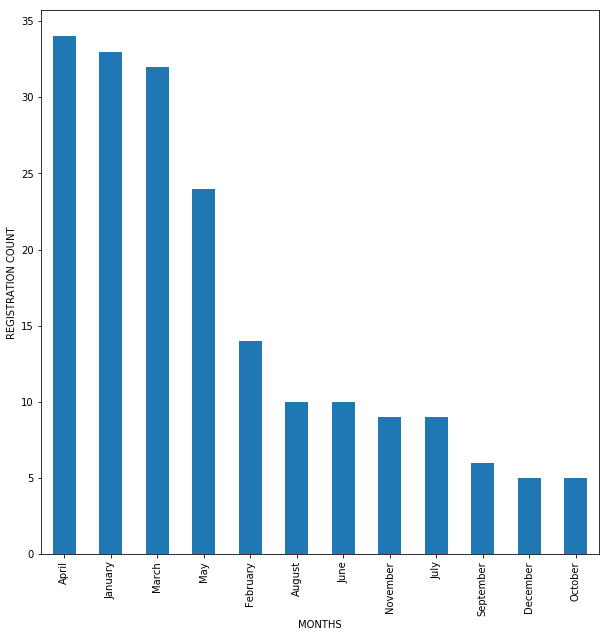

In [120]:
RegDate_CIndex.value_counts().plot(kind="bar",figsize=(10,10))
plt.xlabel("MONTHS")
plt.ylabel("REGISTRATION COUNT")

<h3> As evident , one can find out that April is the month where most registrations take place while October is where least take place.

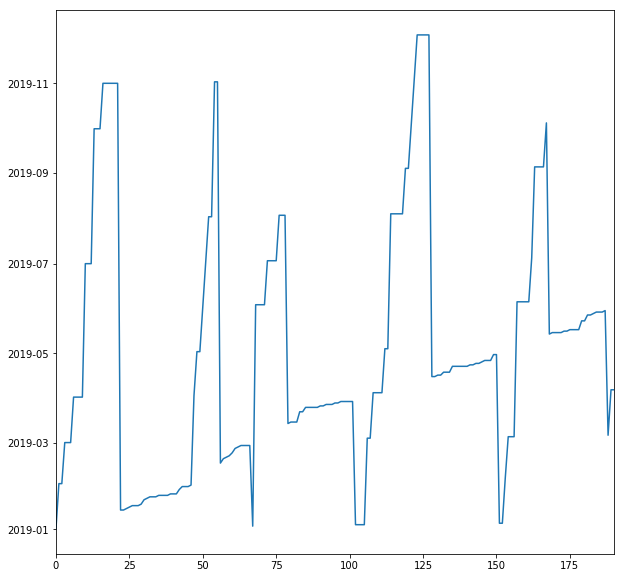

In [17]:
df["RegDate"].plot(figsize=(10,10))

<h3> The Date naturally , is pretty well distributed

In [59]:
df["DeedType"].value_counts()

LEASE,LEASE WITH SECURITY UPTO 5 YEARS             68
SALE,SALE WITHIN MC AREA                           63
RELINQUISHMENT DEED,RELINQUISHMENT DEED            22
GIFT,GIFT WITH IN MC AREA                          10
LEASE,LEASE WITH SECURITY UPTO 10 YEARS             8
LEASE,LEASE UPTO 5 YEARS                            7
PARTITION,ADDITIONAL COPY OF PARTITION              4
AGREEMENT,SALE AGREEMENT                            3
PARTITION,PARTITION                                 3
RECTIFICATION DEED,RECTIFICATION DEED IMMOVABLE     2
MORTGAGE,MORTGAGE WITHOUT POSSESSION                1
Name: DeedType, dtype: int64

(array([ 0.,  2.,  4.,  6.,  8., 10.]), <a list of 6 Text xticklabel objects>)

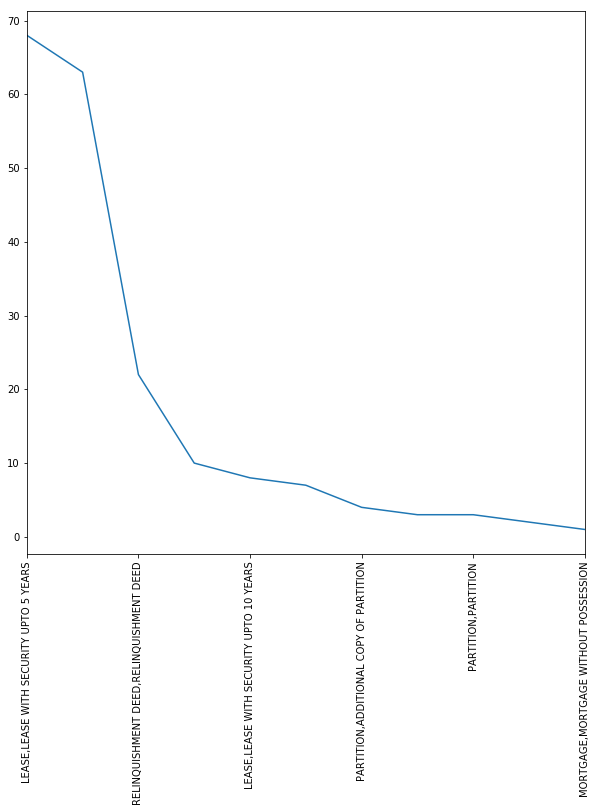

In [63]:
df["DeedType"].value_counts().plot(figsize=(10,10))
plt.xticks(rotation=90)

<h3> The most number of property are Leased while the mortgage count is least.

In [69]:
df["Area(Sq.Meters)"].value_counts().sort_index()

0.100000       1
2.655300       1
7.500000       1
10.000000      1
18.580453      1
25.083000      2
27.870680      1
28.208751      1
30.000000      1
36.000000      2
41.810000      1
45.220000      1
51.096247      1
55.000000      1
57.901338      1
59.365000      1
60.000000      2
61.060000      1
62.428930      1
63.000000      1
65.031587      1
66.889632      1
69.246000      1
69.540000      1
69.676700      1
70.000000      2
73.160000      1
73.750000      1
75.000000      1
81.730000      1
              ..
222.965440     1
232.255667     1
232.500000     1
233.000000     1
245.819398     1
246.655518     1
248.603679     1
250.836120     9
271.739130     1
334.440000     1
350.000000     2
359.810000     1
370.401338     1
371.609067     1
375.000000     1
376.254000     1
376.254181     4
377.090301     2
379.100000     1
379.598662     2
417.000000     1
417.160000     1
418.060201     2
468.227425     1
471.540000     1
595.033000     1
633.510000     1
1226.309922   

<h3> The area count is very discrete and hence , I have binned the areas as per categories to obtain a better understanding of what kind of property size is most evident.

In [79]:
df1 = df.copy(deep=True)
def Area(df1):
    df1.loc[df1['Area(Sq.Meters)'] <= 100, 'Area(Sq.Meters)'] = 1
    df1.loc[(df1['Area(Sq.Meters)'] > 100) & (df1['Area(Sq.Meters)'] <= 500), 'Area(Sq.Meters)'] = 2
    df1.loc[(df1['Area(Sq.Meters)'] > 500) & (df1['Area(Sq.Meters)'] <= 1000), 'Area(Sq.Meters)'] = 3
    df1.loc[(df1['Area(Sq.Meters)'] > 1000) & (df1['Area(Sq.Meters)'] <= 1500), 'Area(Sq.Meters)'] = 4
    df1.loc[(df1['Area(Sq.Meters)'] > 1500) & (df1['Area(Sq.Meters)'] <= 2000), 'Area(Sq.Meters)'] = 5
    df1.loc[(df1['Area(Sq.Meters)'] > 2000) & (df1['Area(Sq.Meters)'] <= 3000), 'Area(Sq.Meters)'] = 6

    return df1

In [80]:
Area(df1)

,Unnamed: 0,RegDate,FirstParty,SecondParty,PropertyAddress,DeedType,PropertyType,Area(Sq.Meters)
0,0,2019-01-01,S C KHURANA,AJAY VISHAL,"House No. B-3/93,Safdarjung Enclave","LEASE,LEASE WITH SECURITY UPTO 5 YEARS",Residential,1.0
1,1,2019-02-01,RAJESH KUMAR BHASIN,MIN HO KIM,"House No. A1/161 FF,Safdarjung Enclave","LEASE,LEASE WITH SECURITY UPTO 5 YEARS",Residential,2.0
2,2,2019-02-01,SANDEEP ARVIND,RADHALAKSHMI R,"House No. A-1/257 F/F REAR PORTION,Safdarjung ...","LEASE,LEASE UPTO 5 YEARS",Residential,1.0
3,3,2019-03-01,LIKHA SAAYA THRU ATT MANOJ KUMAR GULATI,KANUKPRIYA GULATI,"House No. FF PROP NO A-1/62,Safdarjung Enclave","SALE,SALE WITHIN MC AREA",Residential,2.0
4,4,2019-03-01,VISHAL JAIRATH,ITHIKIA HEALTH SCIENCES LLP THRU CHAND RATAN D...,"House No. ENTIRE BASEMENT AND ENTIRE GF, Road ...","LEASE,LEASE WITH SECURITY UPTO 10 YEARS",Commercial,5.0
5,5,2019-03-01,TANUJ KAPUR,ANUJ BAHRI MALHOTRA,"House No. B-4/22 SAFDARJUNG ENCLAVE ND,Safdarj...","RELINQUISHMENT DEED,RELINQUISHMENT DEED",Residential,2.0
6,6,2019-04-01,RAVI KANT BHARDWAJ,ASHOK SHARMA,"House No. FLAT NO B-1/50/1,Safdarjung Enclave","LEASE,LEASE WITH SECURITY UPTO 5 YEARS",Residential,1.0
7,7,2019-04-01,ANJALI BAHL,"SNEH LATA BHARGAV,KUNWAR VIKAS","House No. B-5/44,Safdarjung Enclave","RELINQUISHMENT DEED,RELINQUISHMENT DEED",Residential,1.0
8,8,2019-04-01,EXPRESS TOWERS PVT LTD THRU R.C GOEL,VALMAX BUILDCON PVT LTD THRU MUNISH GOYAL,"House No. B-7/118,Safdarjung Enclave","SALE,SALE WITHIN MC AREA",Residential,2.0
9,9,2019-04-01,SUDESH KOHLI THRU AVINASH KOHLI,MOHD REHAN SIDDIQUE,"House No. A1/269,Safdarjung Enclave","LEASE,LEASE WITH SECURITY UPTO 5 YEARS",Residential,2.0


In [101]:
mapping = {1:"Area(Sq.Meters)<= 100", 2:"Area(Sq.Meters)<=500",3:"Area(Sq.Meters)<=1000",4:"Area(Sq.Meters)<=1500"
           ,5:"Area(Sq.Meters)<=2000",6:"Area(Sq.Meters)<=3000"}

In [91]:
df1["Area(Sq.Meters)"]=df1["Area(Sq.Meters)"].astype("category").cat.rename_categories(mapping)

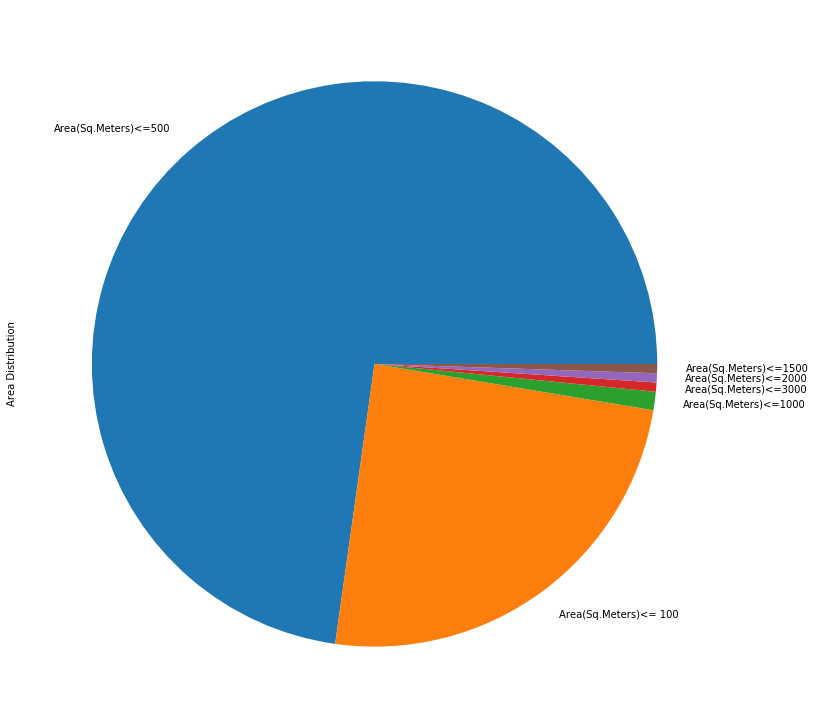

In [107]:
df1["Area(Sq.Meters)"].value_counts().plot("pie",figsize=(13,13),label="Area Distribution")

<h3> Properties with Area less than 500 Sq.Meter are the most common amongst the categories .

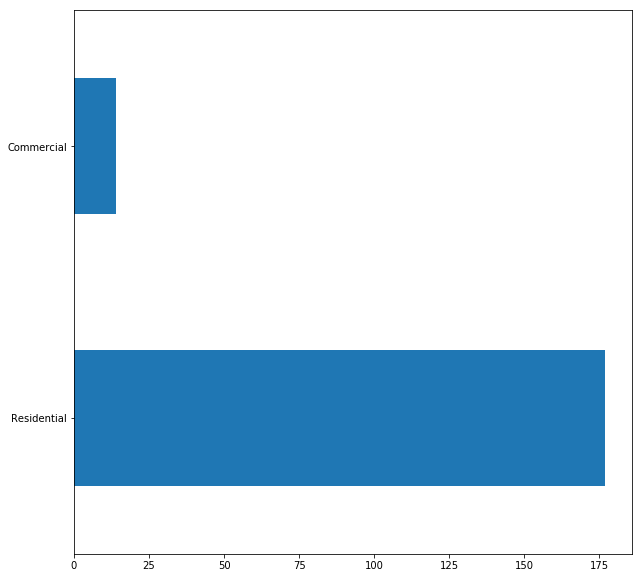

In [67]:
df["PropertyType"].value_counts().plot(kind="barh",figsize=(10,10))

<h3> Residential properties in Safdarjung Enclave clearly outnumber the Commercial ones.

In [123]:
df["Area(Sq.Meters)"].describe()

count     191.000000
mean      198.340664
std       257.613109
min         0.100000
25%       102.096247
50%       151.740000
75%       213.100000
max      2609.100000
Name: Area(Sq.Meters), dtype: float64

<h3> MAX area is 2609 Sq.Meters but is clearly an outlier consideration based on mean and standard deviation as well as visualisation

<h3>END